In [1]:
import pandas as pd
import numpy as np
import glob

In [ ]:
starting = [2.73385267,  3.4666176 ,  3.23349222,  1.59991245,  1.99996493,
        2.16701517,  1.76674304,  2.16685491,  1.99984307,  1.40001664,
        1.36632858,  2.23339597]

finish = [6.29971507,  8.66663091,  6.73326643,  6.80004736,  5.46657408,
        5.5, 12.13346918,  7.83348326,  6.2334016 ,  9.03377229,
        8.33334246,  7.70033587]

In [2]:
experiments = [str(i).zfill(2) for i in range(12)]
cameras = ['drone', 'wheelchair']
models = {'v5':'YOLO v5 small', 'FT':'YOLO v8 nano'}
suffix = ['v5', 'FT']
start_w = [81, 102, 96, 45, 57, 63, 52, 63, 57, 42, 39, 66]
start_d = [81, 102, 96, 45, 57, 63, 52, 63, 57, 42, 39, 66]
end_w = [190, 263, 206, 208, 167, 170, 368, 238, 190, 270, 253, 235]
end_d = [190, 262, 205, 208, 166, 169, 368, 239, 191, 274, 254, 235]


In [ ]:
cameras = ['drone', 'wheelchair']
models = {'v5':'YOLO v5 small', 'FT':'YOLO v8 nano'}
suffix = ['v5', 'ft']

In [3]:
for i,e in enumerate(experiments):
    for cam in cameras:
        for s in suffix:
            df = pd.read_csv(f'extreme_conditions/{e}/bbox_{cam}_{s}.csv', index_col=0)
            if cam == 'drone':
                df_cut = df.iloc[start_d[i]:end_d[i]]
            elif cam == 'wheelchair':
                df_cut = df.iloc[start_w[i]:end_w[i]]

            counts = df_cut.count().T
            total_rows = len(df_cut)
            ratios = counts / total_rows

            df_counts = pd.DataFrame(counts, columns = ['RM Detected'])
            df_ratio = pd.DataFrame(ratios, columns = ['Ratio'])
            merged_df = pd.merge(df_counts, df_ratio, left_index=True, right_index=True)
            merged_df.reset_index(inplace=True)
            merged_df.rename(columns={'index': 'Filter'}, inplace=True)
            merged_df['Total_frames'] = [len(df_cut)]*len(merged_df)
            merged_df['Experiment'] = [i]*len(merged_df)
            merged_df['Camera'] = [cam]*len(merged_df)
            merged_df['Model'] = [models[s]]*len(merged_df)
            custom_order = ['Experiment', 'Camera', 'Model', 'Filter', 'RM Detected', 'Total_frames', 'Ratio']  
            df_sorted = merged_df.reindex(columns=custom_order)
            df_sorted.to_csv(f'table1_new/{e}_{cam}_{s}.csv')


In [17]:
csv_files = glob.glob('table1/*.csv')
csv_files

['table1\\00_drone_FT.csv',
 'table1\\00_drone_FT_s.csv',
 'table1\\00_drone_v5.csv',
 'table1\\00_wheelchair_FT.csv',
 'table1\\00_wheelchair_FT_s.csv',
 'table1\\00_wheelchair_v5.csv',
 'table1\\01_drone_FT.csv',
 'table1\\01_drone_FT_s.csv',
 'table1\\01_drone_v5.csv',
 'table1\\01_wheelchair_FT.csv',
 'table1\\01_wheelchair_FT_s.csv',
 'table1\\01_wheelchair_v5.csv',
 'table1\\02_drone_FT.csv',
 'table1\\02_drone_FT_s.csv',
 'table1\\02_drone_v5.csv',
 'table1\\02_wheelchair_FT.csv',
 'table1\\02_wheelchair_FT_s.csv',
 'table1\\02_wheelchair_v5.csv',
 'table1\\03_drone_FT.csv',
 'table1\\03_drone_FT_s.csv',
 'table1\\03_drone_v5.csv',
 'table1\\03_wheelchair_FT.csv',
 'table1\\03_wheelchair_FT_s.csv',
 'table1\\03_wheelchair_v5.csv',
 'table1\\04_drone_FT.csv',
 'table1\\04_drone_FT_s.csv',
 'table1\\04_drone_v5.csv',
 'table1\\04_wheelchair_FT.csv',
 'table1\\04_wheelchair_FT_s.csv',
 'table1\\04_wheelchair_v5.csv',
 'table1\\05_drone_FT.csv',
 'table1\\05_drone_FT_s.csv',
 'table

In [5]:
import pandas as pd
import glob

# Get a list of all CSV files in the current directory
csv_files = glob.glob('table1_new/*.csv')

# Read each CSV file into a list of dataframes
dfs = [pd.read_csv(file, index_col=0) for file in csv_files]

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)

# Write the merged dataframe to a single CSV file
merged_df.to_csv('merged_data.csv', index=False)

print("Merged CSV file created successfully.")
len(dfs)

Merged CSV file created successfully.


48

In [6]:
df = pd.read_csv('merged_data.csv')

In [7]:
grouped = df.groupby(['Filter', 'Model', 'Camera'])

# Compute mean and standard deviation of ratios by type of filter and model
filter_model_stats = grouped['Ratio'].agg(['mean', 'std'])

# Compute the distribution of ratios by type of filter and model
filter_model_distribution = grouped['Ratio'].apply(lambda x: x.value_counts(normalize=True)).unstack(fill_value=0) * 100

print("Statistics by type of filter and model:")
#filter_model_stats.to_csv('data.csv')
filter_model_stats

Statistics by type of filter and model:


mean       std
Filter   Model         Camera                        
bright_1 YOLO v5 small drone       0.307597  0.145793
                       wheelchair  0.318125  0.135882
         YOLO v8 nano  drone       0.717320  0.098871
                       wheelchair  0.397266  0.098523
bright_2 YOLO v5 small drone       0.301680  0.154655
                       wheelchair  0.295697  0.137043
         YOLO v8 nano  drone       0.783742  0.080535
                       wheelchair  0.524393  0.105606
bright_3 YOLO v5 small drone       0.303463  0.163583
                       wheelchair  0.316342  0.101018
         YOLO v8 nano  drone       0.786357  0.072565
                       wheelchair  0.585027  0.117486
bright_4 YOLO v5 small drone       0.303002  0.163403
                       wheelchair  0.365149  0.107812
         YOLO v8 nano  drone       0.793447  0.079665
                       wheelchair  0.595148  0.111102
dark_1   YOLO v5 small drone       0.300596  0.120947
                       wheelchair  0.332440  0.141070
         YOLO v8 nano  drone       0.453719  0.274075
                       wheelchair  0.247971  0.131253
dark_2   YOLO v5 small drone       0.302813  0.105935
                       wheelchair  0.329721  0.147857
         YOLO v8 nano  drone       0.409367  0.280615
                       wheelchair  0.135767  0.130357
dark_3   YOLO v5 small drone       0.337908  0.106482
                       wheelchair  0.327646  0.154286
         YOLO v8 nano  drone       0.350710  0.297729
                       wheelchair  0.046169  0.040176
dark_4   YOLO v5 small drone       0.211455  0.078902
                       wheelchair  0.236918  0.080108
         YOLO v8 nano  drone       0.000000  0.000000
                       wheelchair  0.000000  0.000000
fog_1    YOLO v5 small drone       0.283540  0.109881
                       wheelchair  0.293131  0.146272
         YOLO v8 nano  drone       0.521635  0.076643
                       wheelchair  0.102825  0.076364
fog_2    YOLO v5 small drone       0.093636  0.045087
                       wheelchair  0.124891  0.104223
         YOLO v8 nano  drone       0.236237  0.088816
                       wheelchair  0.053587  0.017178
fog_3    YOLO v5 small drone       0.000000  0.000000
                       wheelchair  0.001709  0.003575
         YOLO v8 nano  drone       0.036946  0.032650
                       wheelchair  0.016786  0.019000
original YOLO v5 small drone       0.292723  0.126115
                       wheelchair  0.339062  0.141505
         YOLO v8 nano  drone       0.603988  0.160905
                       wheelchair  0.335678  0.098920
rain_1   YOLO v5 small drone       0.327966  0.096436
                       wheelchair  0.206752  0.110903
         YOLO v8 nano  drone       0.568188  0.183423
                       wheelchair  0.221571  0.125849
rain_2   YOLO v5 small drone       0.004893  0.006489
                       wheelchair  0.002015  0.004018
         YOLO v8 nano  drone       0.475766  0.230807
                       wheelchair  0.194961  0.113787
rain_3   YOLO v5 small drone       0.000000  0.000000
                       wheelchair  0.000000  0.000000
         YOLO v8 nano  drone       0.320037  0.261101
                       wheelchair  0.092507  0.089789

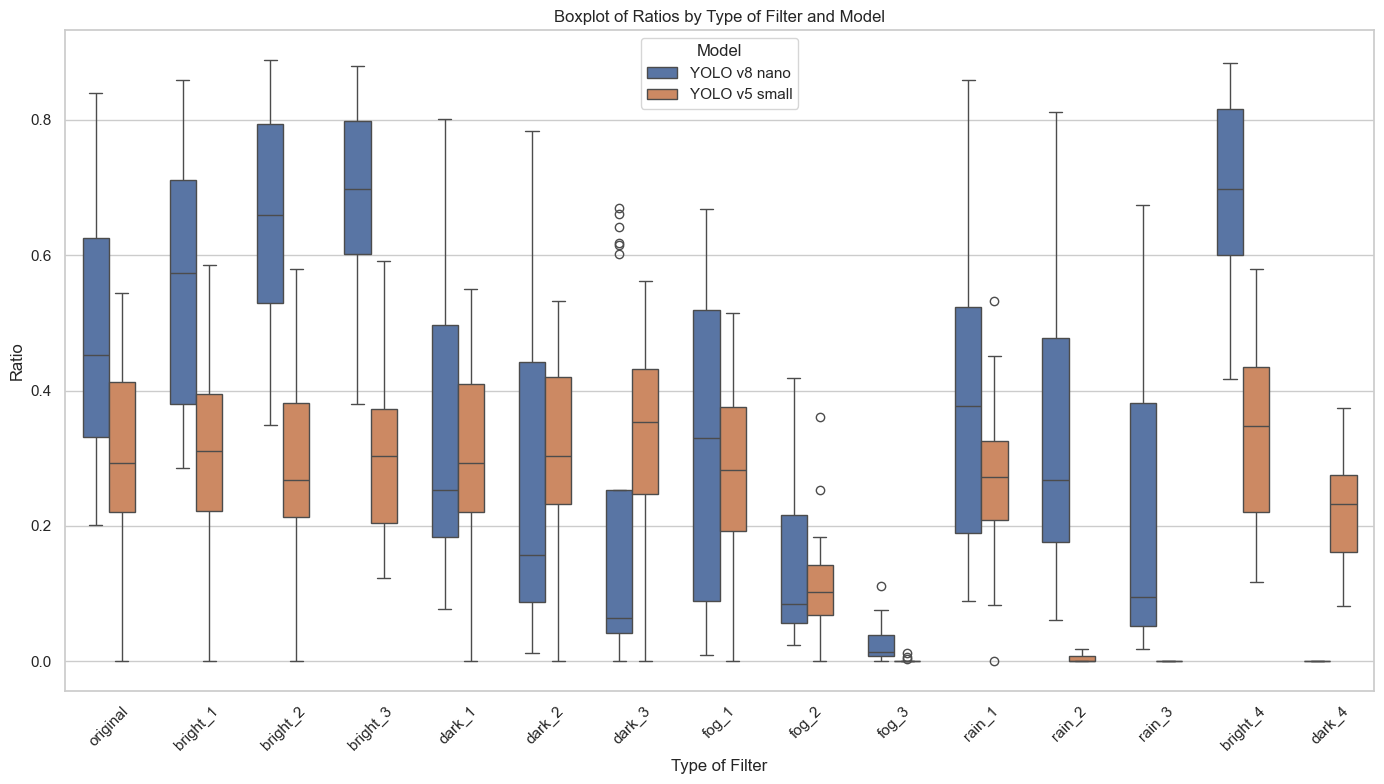

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot for the ratios by type of filter and model
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Filter', y='Ratio', hue='Model', width=0.6)
plt.title('Boxplot of Ratios by Type of Filter and Model')
plt.xlabel('Type of Filter')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

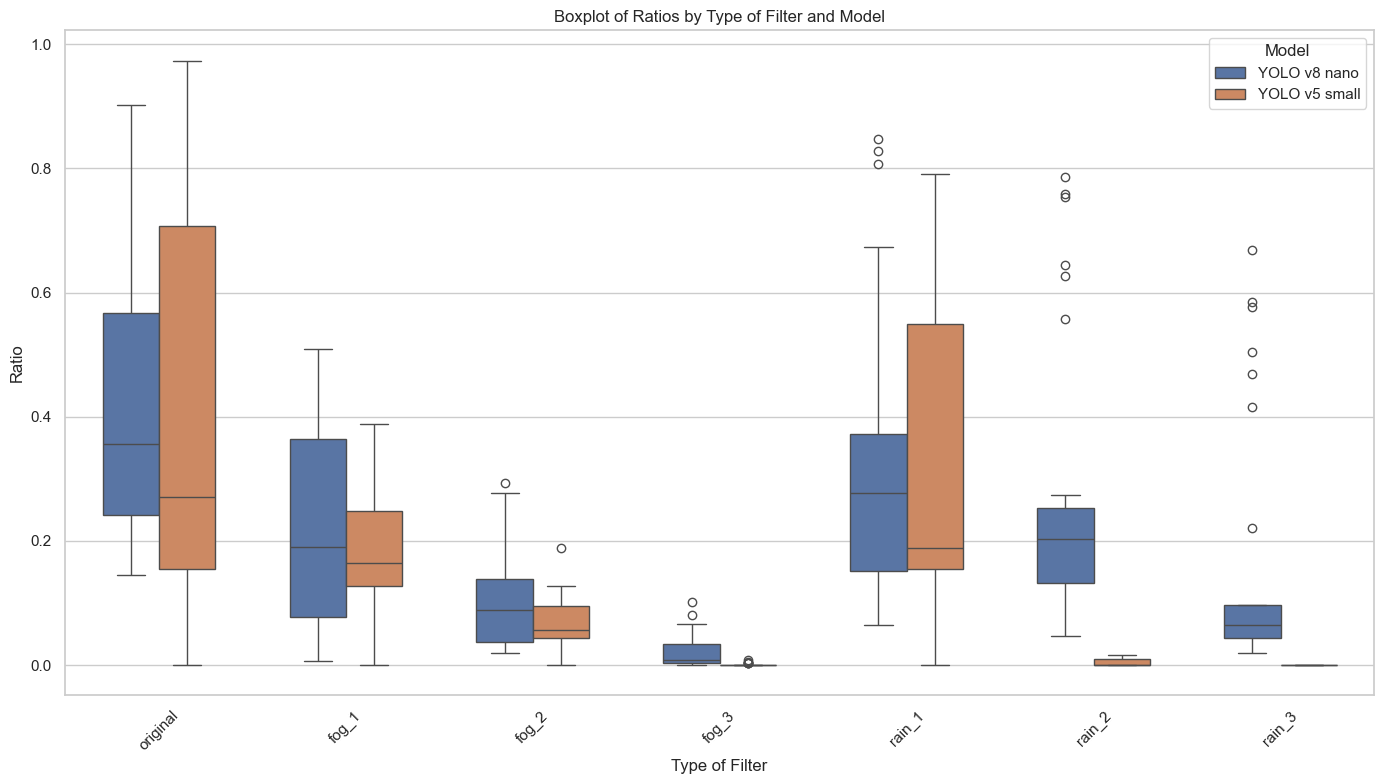

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe to exclude specific filter types
filtered_df = df[~df['Filter'].isin(['bright_1', 'bright_2', 'bright_3', 'dark_1', 'dark_2', 'dark_3'])]
filtered_df = filtered_df[filtered_df['Model'] != 'YOLO v8 small']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot for the ratios by type of filter and model
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_df, x='Filter', y='Ratio', hue='Model', width=0.6)
plt.title('Boxplot of Ratios by Type of Filter and Model')
plt.xlabel('Type of Filter')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

C:\Users\carlo.grigioni\AppData\Local\Temp\ipykernel_17164\2871983080.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels
C:\Users\carlo.grigioni\AppData\Local\Temp\ipykernel_17164\2871983080.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels
C:\Users\carlo.grigioni\AppData\Local\Temp\ipykernel_17164\2871983080.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels
C:\Users\carlo.grigioni\AppData\Local\Temp\ipykernel_17164\2871983080.py:35: UserWarning: set_ticklabels() should only be used with a fixed numbe

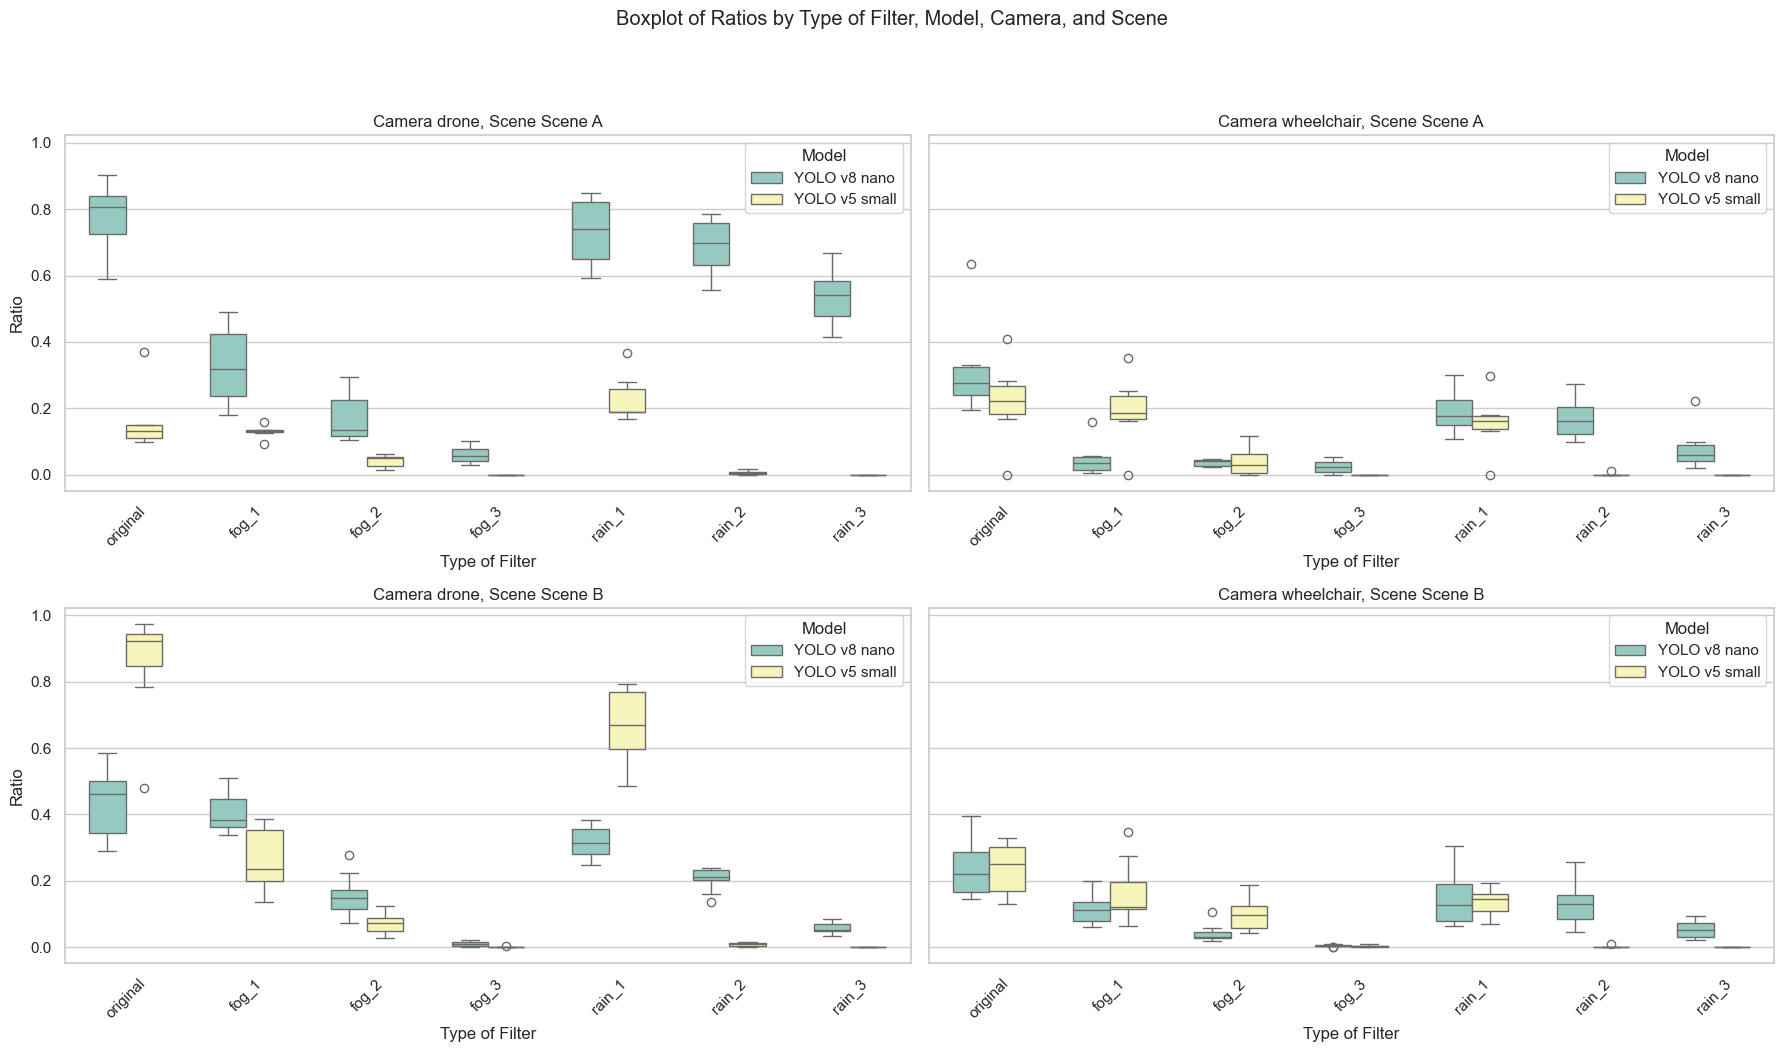

In [51]:

# Filter the dataframe to exclude specific filter types
filtered_df = df[~df['Filter'].isin(['bright_1', 'bright_2', 'bright_3', 'dark_1', 'dark_2', 'dark_3'])]
filtered_df = filtered_df[filtered_df['Model'] != 'YOLO v8 small']

# Define a function to label scenes A and B
def label_scene(experiment):
    if experiment in range(6):
        return 'Scene A'
    else:
        return 'Scene B'

# Apply the function to create a new column 'Scene'
filtered_df['Scene'] = filtered_df['Experiment'].apply(label_scene)

# Set the style of seaborn
sns.set(style="whitegrid")

# Get unique camera and scene values
cameras = filtered_df['Camera'].unique()
scenes = filtered_df['Scene'].unique()

# Create subplots for each combination of camera and scene
fig, axes = plt.subplots(nrows=len(scenes), ncols=len(cameras), figsize=(18, 10), sharey=True)

# Loop through scenes and cameras and create boxplots
for i, scene in enumerate(scenes):
    for j, camera in enumerate(cameras):
        ax = axes[i, j]
        sns.boxplot(data=filtered_df[(filtered_df['Camera'] == camera) & (filtered_df['Scene'] == scene)], 
                    x='Filter', y='Ratio', hue='Model', width=0.6, palette="Set3", ax=ax)
        ax.set_title(f'Camera {camera}, Scene {scene}')
        ax.set_xlabel('Type of Filter')
        ax.set_ylabel('Ratio')
        ax.legend(title='Model')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels

plt.suptitle('Boxplot of Ratios by Type of Filter, Model, Camera, and Scene', y=1.05)
plt.tight_layout()
plt.show()


In [9]:

def label_scene(experiment):
    if experiment in range(6):
        return 'Scene A'
    else:
        return 'Scene B'


df['Scene'] = df['Experiment'].apply(label_scene)


grouped = df.groupby(['Filter', 'Model', 'Camera', 'Scene'])


filter_model_scene_stats = grouped['Ratio'].agg(['mean', 'std'])


filter_model_scene_distribution = grouped['Ratio'].apply(lambda x: x.value_counts(normalize=True)).unstack(fill_value=0) * 100

filter_model_scene_stats

mean       std
Filter   Model         Camera     Scene                      
bright_1 YOLO v5 small drone      Scene A  0.195370  0.040284
                                  Scene B  0.419823  0.122114
                       wheelchair Scene A  0.332076  0.170401
                                  Scene B  0.304174  0.105438
         YOLO v8 nano  drone      Scene A  0.756254  0.093265
...                                             ...       ...
rain_3   YOLO v5 small wheelchair Scene B  0.000000  0.000000
         YOLO v8 nano  drone      Scene A  0.566850  0.057657
                                  Scene B  0.073224  0.021401
                       wheelchair Scene A  0.125144  0.118305
                                  Scene B  0.059869  0.034406

[120 rows x 2 columns]

In [10]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Now print your DataFrame
print(filter_model_scene_stats)

                                               mean       std
Filter   Model         Camera     Scene                      
bright_1 YOLO v5 small drone      Scene A  0.195370  0.040284
                                  Scene B  0.419823  0.122114
                       wheelchair Scene A  0.332076  0.170401
                                  Scene B  0.304174  0.105438
         YOLO v8 nano  drone      Scene A  0.756254  0.093265
                                  Scene B  0.678386  0.095758
                       wheelchair Scene A  0.449374  0.106544
                                  Scene B  0.345159  0.059048
bright_2 YOLO v5 small drone      Scene A  0.181026  0.039717
                                  Scene B  0.422333  0.126905
                       wheelchair Scene A  0.317290  0.165554
                                  Scene B  0.274104  0.113095
         YOLO v8 nano  drone      Scene A  0.753248  0.084923
                                  Scene B  0.814236  0.069463
        

In [11]:
filter_model_scene_stats.to_csv('scene_stats.csv')

In [12]:
filter_model_scene_stats.index = filter_model_scene_stats.index.set_levels(
    filter_model_scene_stats.index.levels[1].str.replace('YOLO v5 small', 'v5').str.replace('YOLO v8 nano', 'v8'),
    level=1
)

# Drop all rows where the index contains 'YOLO v8 small'
filter_model_scene_stats = filter_model_scene_stats[~filter_model_scene_stats.index.get_level_values(1).str.contains('YOLO v8 small')]

In [13]:
filter_model_scene_stats.index = filter_model_scene_stats.index.set_levels(
    filter_model_scene_stats.index.levels[3].str.replace('Scene A', 'A').str.replace('Scene B', 'B'),
    level=3
)

In [14]:
filter_model_scene_stats = filter_model_scene_stats[
    ~filter_model_scene_stats.index.get_level_values(1).str.contains('bright1|bright2|bright3')
]

In [15]:
# Convert DataFrame to LaTeX table
latex_table = filter_model_scene_stats.to_latex(index=True, header=False)

print(latex_table)

\begin{tabular}{llllrr}
\toprule
Filter & Model & Camera & Scene &  &  \\
\midrule
\multirow[t]{8}{*}{bright_1} & \multirow[t]{4}{*}{v5} & \multirow[t]{2}{*}{drone} & A & 0.195370 & 0.040284 \\
 &  &  & B & 0.419823 & 0.122114 \\
\cline{3-6}
 &  & \multirow[t]{2}{*}{wheelchair} & A & 0.332076 & 0.170401 \\
 &  &  & B & 0.304174 & 0.105438 \\
\cline{2-6} \cline{3-6}
 & \multirow[t]{4}{*}{v8} & \multirow[t]{2}{*}{drone} & A & 0.756254 & 0.093265 \\
 &  &  & B & 0.678386 & 0.095758 \\
\cline{3-6}
 &  & \multirow[t]{2}{*}{wheelchair} & A & 0.449374 & 0.106544 \\
 &  &  & B & 0.345159 & 0.059048 \\
\cline{1-6} \cline{2-6} \cline{3-6}
\multirow[t]{8}{*}{bright_2} & \multirow[t]{4}{*}{v5} & \multirow[t]{2}{*}{drone} & A & 0.181026 & 0.039717 \\
 &  &  & B & 0.422333 & 0.126905 \\
\cline{3-6}
 &  & \multirow[t]{2}{*}{wheelchair} & A & 0.317290 & 0.165554 \\
 &  &  & B & 0.274104 & 0.113095 \\
\cline{2-6} \cline{3-6}
 & \multirow[t]{4}{*}{v8} & \multirow[t]{2}{*}{drone} & A & 0.753248 & 0.08492